# 라이브러리 호출

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

---
# 데이터 불러오기

In [50]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')
submission = pd.read_csv('./dataset/submission.csv')

In [51]:
train.head(10)

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
5,6,8,C,4,3,0,3,3,4,3,...,4,3,0,4,4,4,2,2,3,4
6,7,1,Q,0,0,4,2,4,0,4,...,4,3,2,0,4,4,4,3,1,3
7,8,3,M,1,0,3,4,4,0,2,...,2,0,4,4,4,0,2,2,3,1
8,9,6,F,0,1,0,4,0,1,2,...,3,2,4,4,4,1,0,1,3,3
9,10,8,J,4,3,4,0,0,0,4,...,2,0,0,1,3,0,3,3,1,2


In [52]:
train.shape

(2048, 787)

In [53]:
test.shape

(20480, 786)

---
# 전처리

In [54]:
x_train = train.iloc[:, 3:] / 255.
y_train = train['digit']

---
# 모델링

In [57]:
model = models.Sequential()
    
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.20))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.20))

model.add(layers.Flatten())
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_13 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)         

In [58]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

---
# 모델 학습

In [59]:
from sklearn.model_selection import train_test_split
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [60]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train.values)

x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state = 42)

print(x_train2.shape, x_val.shape)

(1843, 28, 28, 1) (205, 28, 28, 1)


In [61]:
# 일반 fit
history = model.fit(
    x_train2, y_train2, 
    epochs=45,
    callbacks=[annealer, early_stopping],
    validation_data=(x_val, y_val),
    verbose=2
)

Train on 1843 samples, validate on 205 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/45
1843/1843 - 1s - loss: 2.2493 - accuracy: 0.1666 - val_loss: 2.0565 - val_accuracy: 0.2829

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00095.
Epoch 2/45
1843/1843 - 1s - loss: 1.9810 - accuracy: 0.2811 - val_loss: 1.7623 - val_accuracy: 0.3805

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009025.
Epoch 3/45
1843/1843 - 1s - loss: 1.6584 - accuracy: 0.4254 - val_loss: 1.3793 - val_accuracy: 0.5220

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000857375.
Epoch 4/45
1843/1843 - 1s - loss: 1.3894 - accuracy: 0.5220 - val_loss: 1.2807 - val_accuracy: 0.5951

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0008145062499999999.
Epoch 5/45
1843/1843 - 1s - loss: 1.2255 - accuracy: 0.5849 - val_loss: 1.0842 - val_accuracy: 0.6341

Epoch 00006: LearningRateScheduler reducing learning rate to 0.000773


Epoch 00045: LearningRateScheduler reducing learning rate to 0.00010467395472325501.
Epoch 45/45
1843/1843 - 1s - loss: 0.3469 - accuracy: 0.8763 - val_loss: 0.6103 - val_accuracy: 0.8195


---
# 모델 평가

In [62]:
print(model.evaluate(x_train2, y_train2, verbose=2))

1843/1 - 0s - loss: 0.2678 - accuracy: 0.9571
[0.20941022596343728, 0.9571351]


In [63]:
print(model.evaluate(x_val, y_val, verbose=2))

205/1 - 0s - loss: 0.4103 - accuracy: 0.8195
[0.6103199753819443, 0.8195122]


---

# Matplotlib 시각화

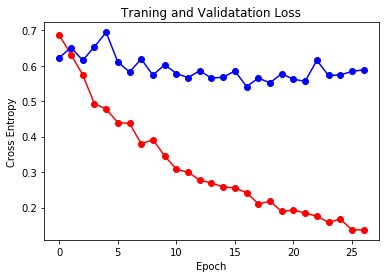

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,  'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Traning and Validatation Loss')
plt.show()

---
# 모델 예측

In [44]:
x_test = (test.iloc[:, 2:] / 255.).values.reshape(-1, 28, 28, 1)

y_test = model.predict(x_test)

In [45]:
y_test = np.argmax(y_test, axis=1)
y_test = pd.Series(y_test, name="digit")
submission = pd.concat([pd.Series(range(2049, 22529), name="id"), y_test], axis=1)
submission.to_csv("2020-08-13-pred1.csv", index=False)

---

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.10
)

In [67]:
train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=(28, 28),
    batch_size=16,
)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'dataset/train'

---
# Albumentation 시험

In [288]:
from numpy import expand_dims

In [289]:
x_train = train.iloc[:, 3:]

In [290]:
x_train.head()
x_train = x_train.values.reshape(-1, 28, 28)

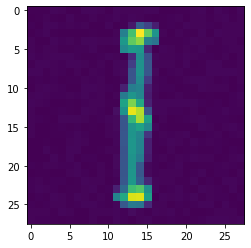

(28, 28)

In [291]:
plt.imshow(x_train[0])
plt.show()
x_train[0].shape

<function matplotlib.pyplot.show(*args, **kw)>

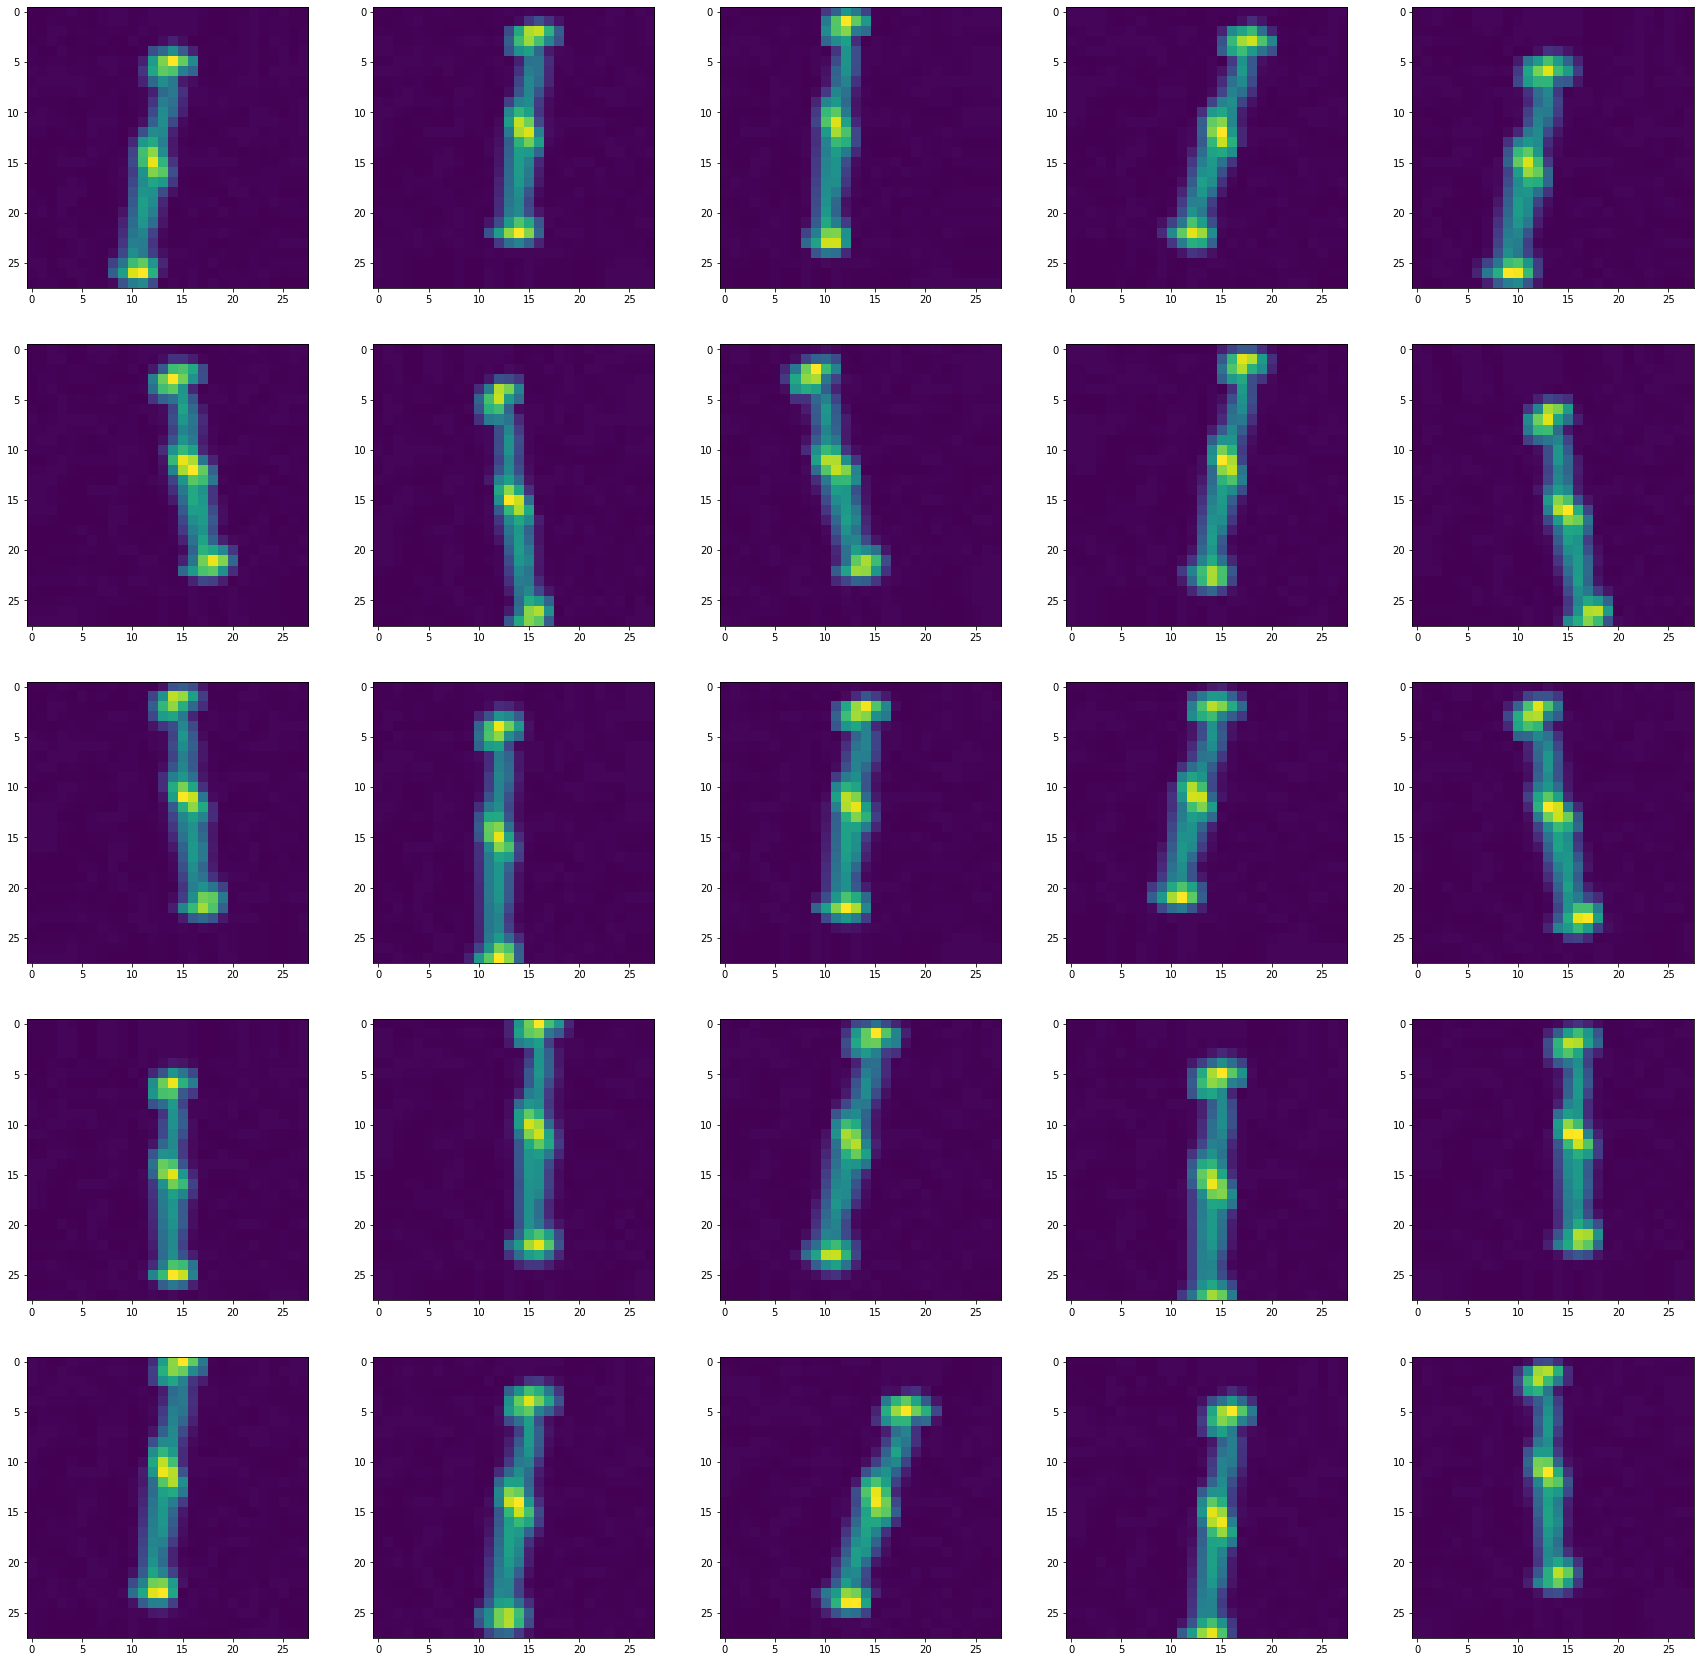

In [292]:
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.int)
samples = expand_dims(x_train[0], axis=0)

datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.10
)

it = datagen.flow(samples, batch_size=32)
fig = plt.figure(figsize = (30, 30))

for i in range(25):
    plt.subplot(5, 5, i+1)
    
    batch = it.next()
    
    image = batch[0].astype('uint8')
    plt.imshow(image.reshape(28, 28))
plt.show